<a href="https://colab.research.google.com/github/SALAIJSEALAN/titanic-ml-internship-NeuroNexus-Innovations-/blob/main/JSEALANSENTHIL%20ML%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Import required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# STEP 2: Upload dataset manually in Colab (run this cell, select `tested.csv`)
from google.colab import files
uploaded = files.upload()

# STEP 3: Load dataset
df = pd.read_csv("tested.csv")

# STEP 4: Data cleaning
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

# STEP 5: Split dataset
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# STEP 7: Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Saving tested.csv to tested.csv


<ipython-input-1-52fa56c10e6d>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-1-52fa56c10e6d>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [2]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 1.0


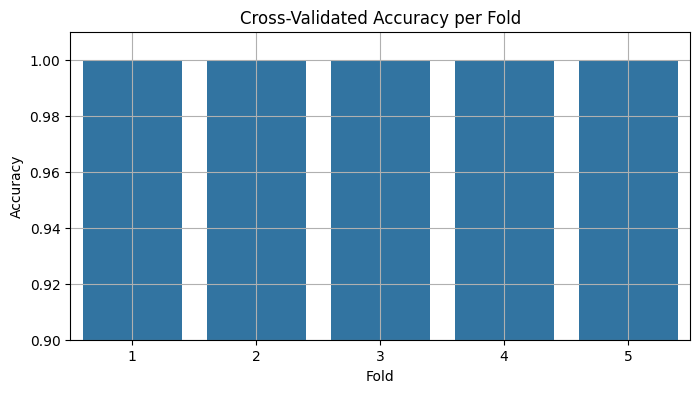

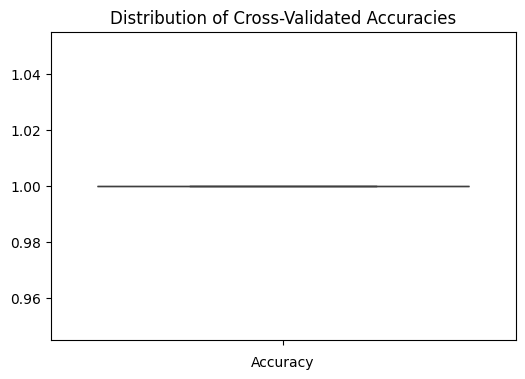

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)


plt.figure(figsize=(8, 4))
sns.barplot(x=list(range(1, 6)), y=scores)
plt.ylim(0.9, 1.01)
plt.title("Cross-Validated Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


plt.figure(figsize=(6, 4))
sns.boxplot(scores)
plt.title("Distribution of Cross-Validated Accuracies")
plt.xlabel("Accuracy")
plt.show()
